In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from rk4 import RungeKutta4

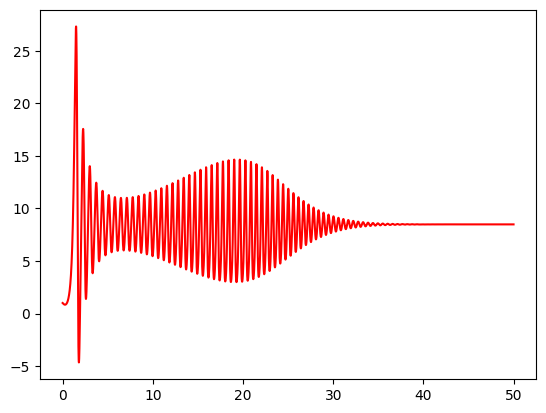

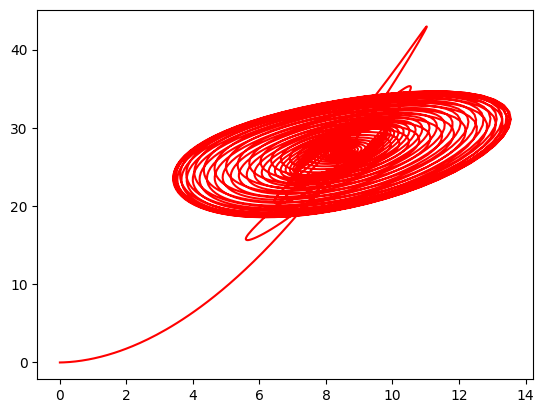

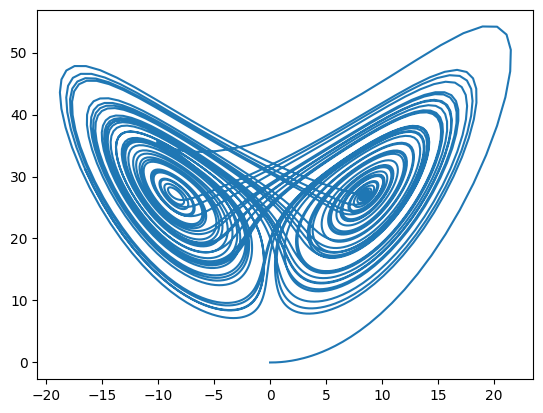

<Figure size 640x480 with 0 Axes>

In [7]:
#%%
def EDOs(f,S0,t0,tf,n):
    """
    Calcula a solução para um sistema de EDOs de primeira ordem.

    Args:
        f (_type_): _description_
        S0 (_type_): _description_
        t0 (_type_): _description_
        tf (_type_): _description_
        n (_type_): _description_

    Returns:
        _type_: _description_
    """
    t = np.zeros(n+1)
    S = np.zeros((n+1,len(S0))) # S[i,k] solução equação k no tempo t[i]
    S[0] = S0
    t[0] = ti
    h = float(tf-ti)/n
    for i in range(n):
        t[i+1] = t[i] + h
        S[i+1] = S[i] + h * f(S[i])
    return  S, t

def f(S, sigma = 10, ro = 28, ß = 8/3):
    """
    Calcula as equações de Lorenz:
        dx/dt = sigma*(y-x)
        dy/dt = x*(ro - z) - y
        dz/dt = x*y - ß*z

    Args:
        S (numpy.array): S[0] = x, S[1] = y, S[2] = z
        sigma (float, optional): número de Prandtl. Defaults to 10.
        ro (float, optional): número de Rayleigh. Defaults to 28.
        ß (float, optional): .Defaults to 8/3.

    Returns:
        numpy.array([dxdt, dydt, dzdt]): valores calculados.
    """
    x = S[0]; y = S[1]; z = S[2]                    # Torna o código legível
    return np.array([sigma*(y - x), ro*x - y - x*z,\
        x*y - ß*z])

# Variáveis.
s0 = np.array([0 , 1, 0])
ti = 0
tf = 50
n = 5000

xie, tie = EDOs(f,s0,ti,tf,n)
xi ,ti = RungeKutta4(f,s0,ti,tf,n)

plt.figure()
plt.plot(ti,xi[:,1])

plt.figure()
plt.plot(xi[:,0], xi[:,2])

plt.figure()
plt.plot(xie[:,0], xie[:,2])

plt.figure()
plt.plot(tie,xie[:,1])

plt.show()